# Problem Description and Details
## Udacity Data Scientist Nanodegree Program: Project 1
### Housing price analysis

HM Land Registry publish the “Price Paid Data”, detailed data on the sale prices of properties in England and Wales. Datasets are published monthly with transaction-level information, including price, date, location, property type, property age, tenure duration, and transaction type. Datasets are available in bulk in multiple file formats and filtered via the Linked Data API. Please use whatever source is most appropriate to your analysis, acknowledging it appropriately in your report.

**Objectives**
1) Pick a dataset
2) Pose at least three questions related to business or real-world applications of how the data could be used
3) Create a Jupyter Notebook, using any associated packages you'd like, to:

    Prepare data:

    - Gather necessary data to answer your questions
    - Handle categorical and missing data
    - Provide insight into the methods you chose and why you chose them
        
    Analyze, Model, and Visualize:
    
    - Provide a clear connection between your business questions and how the data answers them

4) Communicate your business insights:
    - Create a Github repository to share your code and data wrangling/modeling techniques, with a technical audience in mind
    - Create a blog post to share your questions and insights with a non-technical audience

**Outputs:**

There are two deliverables that are required for project completion:
1. A Github repository for the code
2. A blog post of your findings

In [1]:
# import analysis libraries
import pandas as pd
import numpy as np
from itertools import groupby 
import itertools

# Exploratory visual analysis libraries
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
import seaborn as sns
from matplotlib.cbook import boxplot_stats 

In [2]:
# Configuring styles for charts and graphs
sns.set_style("white")
matplotlib.rcParams['font.size'] = 20
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15)
matplotlib.rcParams['figure.figsize'] = (10,10)

In [72]:
# Load datasets

# Housing price data columns
col_names =    ["transaction_unique_identifier",
                "price",
                "date_of_transfer",
                "postcode",
                "property_type",
                "old/new",
                "duration",
                "PAON", 
                "SAON",
                "street", 
                "locality", 
                "town/city", 
                "district", 
                "county", 
                "PPD_category_type", 
                "record_status_monthly_file_only"]

# Data availavble at the url
url="http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2022.csv"

df = pd.read_csv(url, header = None, names=col_names )

In [75]:
df.columns

Index(['transaction_unique_identifier', 'price', 'date_of_transfer',
       'postcode', 'property_type', 'old/new', 'duration', 'PAON', 'SAON',
       'street', 'locality', 'town/city', 'district', 'county',
       'PPD_category_type', 'record_status_monthly_file_only'],
      dtype='object')

### Data Cleaning
- Remove unwanted leading and trailing spaces from string columns.
- Convert date columns to the correct formats
- Create Month and year columns from the date for an easier analysis

In [76]:
#1 Convert the date column to date format and also create month and year columns for easier analysis later
df['date_of_transfer'] = pd.to_datetime(df['date_of_transfer'])
df['year_of_transfer'] = df['date_of_transfer'].dt.year
df['month_of_transfer'] = df['date_of_transfer'].dt.month

In [77]:
# Remove unnecessary blank spaces if any from the data in the object columns
for i in df.columns:
    if df[i].dtypes == 'object':
        df[i] = df[i].str.strip()

In [78]:
df

,transaction_unique_identifier,price,date_of_transfer,postcode,property_type,old/new,duration,PAON,SAON,street,locality,town/city,district,county,PPD_category_type,record_status_monthly_file_only,year_of_transfer,month_of_transfer
0,{5BBE9CB3-6332-4EB0-9CD3-8737CEA4A65A},42000,1995-12-21,NE4 9DN,S,N,F,8,NaN,MATFEN PLACE,FENHAM,NEWCASTLE UPON TYNE,NEWCASTLE UPON TYNE,TYNE AND WEAR,A,A,1995,12
1,{20E2441A-0F16-49AB-97D4-8737E62A5D93},95000,1995-03-03,RM16 4UR,S,N,F,30,NaN,HEATH ROAD,GRAYS,GRAYS,THURROCK,THURROCK,A,A,1995,3
2,{D893EE64-4464-44B5-B01B-8E62403ED83C},74950,1995-10-03,CW10 9ES,D,Y,F,15,NaN,SHROPSHIRE CLOSE,MIDDLEWICH,MIDDLEWICH,CONGLETON,CHESHIRE,A,A,1995,10
3,{F9F753A8-E56A-4ECC-9927-8E626A471A92},43500,1995-11-14,TS23 3LA,S,N,F,19,NaN,SLEDMERE CLOSE,BILLINGHAM,BILLINGHAM,STOCKTON-ON-TEES,STOCKTON-ON-TEES,A,A,1995,11
4,{E166398A-A19E-470E-BB5A-83B4C254CF6D},63000,1995-09-08,CA25 5QH,S,N,F,8,NaN,CROSSINGS CLOSE,CLEATOR MOOR,CLEATOR MOOR,COPELAND,CUMBRIA,A,A,1995,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27641643,{E2D14905-55E3-4C2D-E053-6B04A8C0422B},432000,2022-05-20,RM9 5UL,T,N,F,59,NaN,CONNOR ROAD,NaN,DAGENHAM,BARKING AND DAGENHAM,GREATER LONDON,A,A,2022,5
27641644,{E2D14905-55E4-4C2D-E053-6B04A8C0422B},510000,2022-04-29,E4 8PH,T,N,F,27,NaN,SINCLAIR ROAD,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A,A,2022,4
27641645,{E2D14905-55E5-4C2D-E053-6B04A8C0422B},635000,2022-05-23,E17 4PN,T,N,F,133,NaN,CHINGFORD ROAD,NaN,LONDON,WALTHAM FOREST,GREATER LONDON,A,A,2022,5
27641646,{E2D14905-55E6-4C2D-E053-6B04A8C0422B},895000,2022-04-01,IG8 9EH,T,N,F,35,NaN,ST ALBANS CRESCENT,NaN,WOODFORD GREEN,REDBRIDGE,GREATER LONDON,A,A,2022,4


## Understanding the columns
There are 16 columns in the dataset, many of which are self explanatory - city, district etc. Let's have a look at some that are not understood directly:
1. **Transaction unique identifier**: A reference number which is generated automatically recording each published sale. The number is unique and will  change  each time a sale is recorded.
2. **Price**: Sale price stated on the transfer deed.
3. **Date of Transfer**: Date when the sale was completed, as stated on the transfer deed.
4. **Property Type**:	
          D = Detached
          S = Semi-Detached
          T = Terraced
          F = Flats/Maisonettes
          O = Other (where the transaction relates to a property 
          type that is not covered by existing values above)

5. **Old/New**:	Indicates the age of the property and applies to all price paid transactions, residential and non-residential.
          Y = a newly built property, 
          N = an established residential building
6. **Duration	Relates to the tenure**:   
          F = Freehold 
          L = Leasehold etc.
              HM Land Registry does not record leases of 7 years or less in the Price Paid Dataset.
7. **PAON**	: Primary Addressable Object Name. Typically the house number or name.
8. **SAON**	: Secondary Addressable Object Name. Where a property has been divided into separate units (for example, flats), the PAON will identify the building and a SAON will be specified that identifies the separate unit/flat.
9. **PPD Category Type**: Indicates the type of Price Paid transaction.

          A = Standard Price Paid entry, includes single residential property sold for value.
    
          B = Additional Price Paid entry including transfers under a power of sale/repossessions, 
              buy-to-lets (where they can be  identified by a Mortgage), transfers to non-private individuals 
              and sales where the property type is classed as ‘Other’. HM Land Registry has been collecting information 
              on Category A transactions from January 1995. Category B transactions were identified from October 2013.
    
10. **Record Status - monthly file only**:	Indicates additions, changes and deletions to the records.(see guide below).
      A = Addition
      C = Change
      D = Delete

In [79]:
# Rows and columns in the data

df.shape

(27641648, 18)

In [80]:
# Describe the numerical values in the data. 
# The additional code after describe is to get the counts in proper decimal formatting.

df['price'].describe().apply(lambda x: format(x, ',.2f'))

count     27,641,648.00
mean         213,727.10
std          850,603.36
min                1.00
25%           83,500.00
50%          147,000.00
75%          244,000.00
max      594,300,000.00
Name: price, dtype: object

In [81]:
# Count localities - town, city ,district and county

for col in ["locality","town/city","district","county"]:
    print(col, " : ", df[col].nunique())

locality  :  23821
town/city  :  1172
district  :  463
county  :  130


In [82]:
# Counting empty entries in the columns

for col in df.columns:
    print(col, " : ", df[col].isna().sum())

transaction_unique_identifier  :  0
price  :  0
date_of_transfer  :  0
postcode  :  44648
property_type  :  0
old/new  :  0
duration  :  0
PAON  :  4191
SAON  :  24402244
street  :  435893
locality  :  9691951
town/city  :  0
district  :  0
county  :  0
PPD_category_type  :  0
record_status_monthly_file_only  :  0
year_of_transfer  :  0
month_of_transfer  :  0


### Summary of the above

- There are 27,641,648 rows and 18 columns. This means data of over 27 million homes.
- There are 23821 localities , 1172 towns, 463 districts and 130 counties in the data.
- There is no empty or missing data that has to be eliminated.
- THe mean is 213,000 while the max is 594,300,000 -> it means the data has outliers! We need to filter them out.

### General distribution and outlier removal

Since the data doesn’t follow a normal distribution, we will calculate the outlier data points using the statistical method called interquartile range (IQR). Using the IQR, the outlier data points are the ones falling below Q1–1.5 IQR or above Q3 + 1.5 IQR. The Q1 is the 25th percentile and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1).

[Text(0.5, 1.0, 'Housing Price Distribution')]

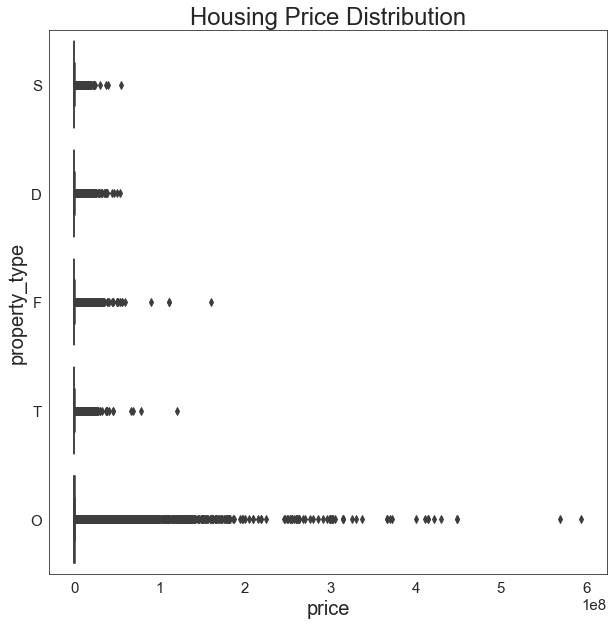

In [83]:
# Boxplot of the fractional data
sns.boxplot(x = df['price'], y = df['property_type'], orient = "h").set(title='Housing Price Distribution')

In [84]:
# Let us check the outliers from the distribution stats
stats = boxplot_stats(df['price'].values)

In [85]:
stats

[{'mean': 213727.1004229198,
  'iqr': 160500.0,
  'cilo': 146952.07162296234,
  'cihi': 147047.92837703766,
  'whishi': 484750,
  'whislo': 1,
  'fliers': array([693000, 665000, 692500, ..., 510000, 635000, 895000], dtype=int64),
  'q1': 83500.0,
  'med': 147000.0,
  'q3': 244000.0}]

In [86]:
# Create a function to get the outliers

def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1

   outliers = list(df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))])

   return outliers

In [87]:
# Get outliers from each group and combine the values in a list
outlier = []
for i in df['property_type'].unique():
    outlier.append(find_outliers_IQR(df['price'][df['property_type'] == i]))

outlier_list = list(dict.fromkeys(list(itertools.chain.from_iterable(outlier))))

#### What to do with the outliers?
In this case, in order to simplify - I will remove the outlier price rows

In [88]:
# Remove outliers that we got in the outlier list
df = df[~df['price'].isin(outlier_list)]
df.shape

(24544821, 18)

[Text(0.5, 1.0, 'Housing Price Distribution')]

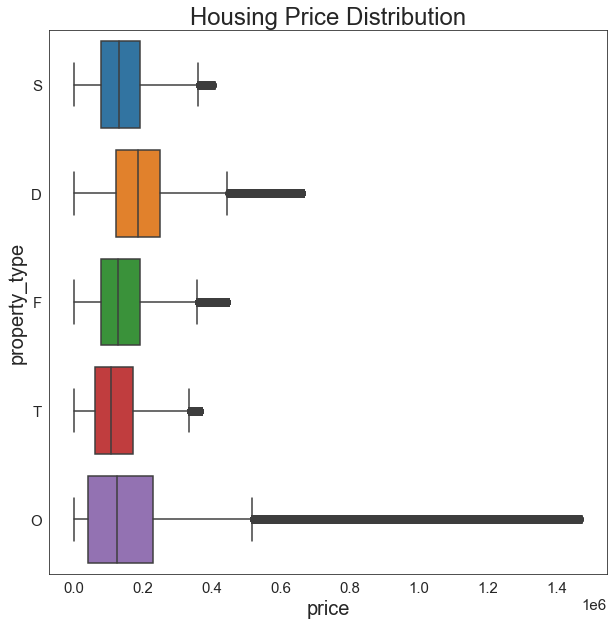

In [89]:
# Boxplot of the outlier-free data
sns.boxplot(x = df['price'], y = df['property_type'], orient = "h").set(title='Housing Price Distribution')

We can see that the box plots already look much better than before. Now we can use this data to answer some exploratory questions!

### Exploratory analysis of a few initial questions:

#### 1. What is the most sold property type over the years?
- It would be interesting to get an insight on what type of property is commonly sold throughout the years.

[Text(0.5, 0, 'property_type'),
 Text(0, 0.5, 'count in millions'),
 Text(0.5, 1.0, 'Most sold property type')]

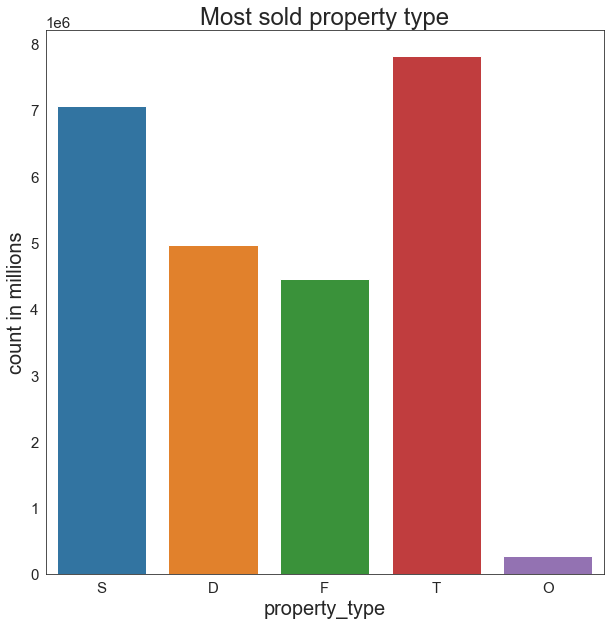

In [90]:
#create countplot to check the count of property types

cplot = sns.countplot(x=df["property_type"])
cplot.set(xlabel='property_type', ylabel='count in millions', title = 'Most sold property type')

#### Insights from 1:
We see that with the total houses sold since 1995, terraced houses are the most common, followed closely by semi-detached houses.


#### 2. Which is the 10 topmost cities?

In [91]:
#Selected top 10 and sorting by value count
top_10_cities = df['town/city'].value_counts().head(10).rename_axis('town/city').reset_index(name='counts')
top_10_cities = top_10_cities.sort_values(by=['counts'], ascending=False)

#Selected top 10 and sorting by total price
top_10_cities_val = df.groupby(df['town/city'])[['price']].sum().reset_index().rename(columns={"price": "total"})
top_10_cities_val = top_10_cities_val.sort_values(by=['total'], ascending=False).head(10)

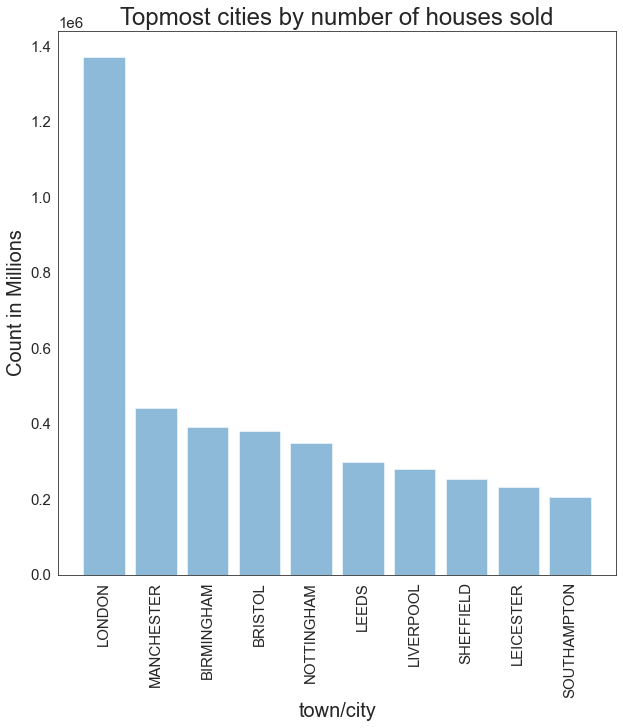

In [92]:
# Plot bar chart count

plt.bar(top_10_cities['town/city'],top_10_cities['counts'], align='center', alpha=0.5)
plt.xlabel("town/city")
plt.ylabel("Count in Millions")
plt.title('Topmost cities by number of houses sold')

plt.xticks(top_10_cities['town/city'], rotation=90)
plt.show()
plt.show()

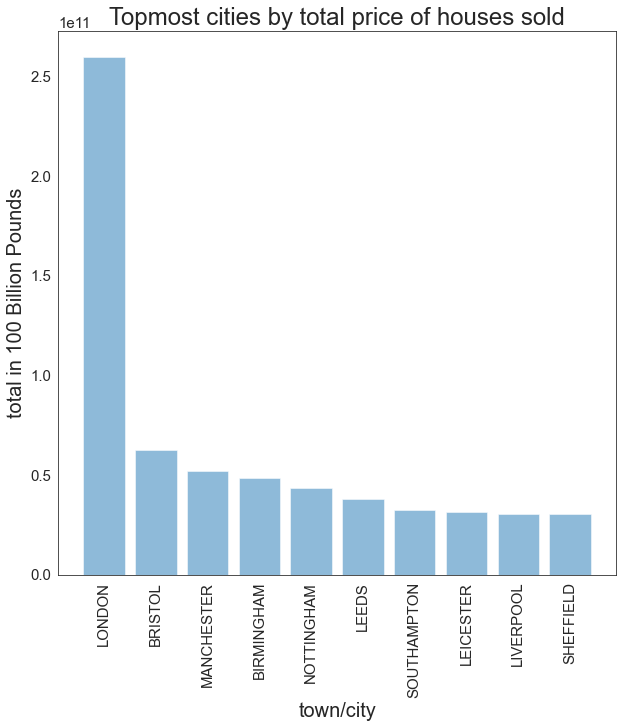

In [93]:
# Plot bar chart total price

plt.bar(top_10_cities_val['town/city'],top_10_cities_val['total'], align='center', alpha=0.5)
plt.xlabel("town/city")
plt.ylabel("total in 100 Billion Pounds")
plt.title('Topmost cities by total price of houses sold')

plt.xticks(top_10_cities['town/city'], rotation=90)
plt.show()
plt.show()

#### Insights from 2
London, being a large city naturally has a lot of houses sold and also has the largest total value of houses. The next cities are Bristol and Manchestor.

#### 3. Which property type is popular in London?
Let us zoom in on london and check out the most sold property type

In [94]:
# Select data with city as london
houses_london = df[df['town/city']=='LONDON']

# Use Groupby
houses_london_type = houses_london.groupby('property_type')['transaction_unique_identifier'].count().rename_axis('property_type').reset_index(name='counts')


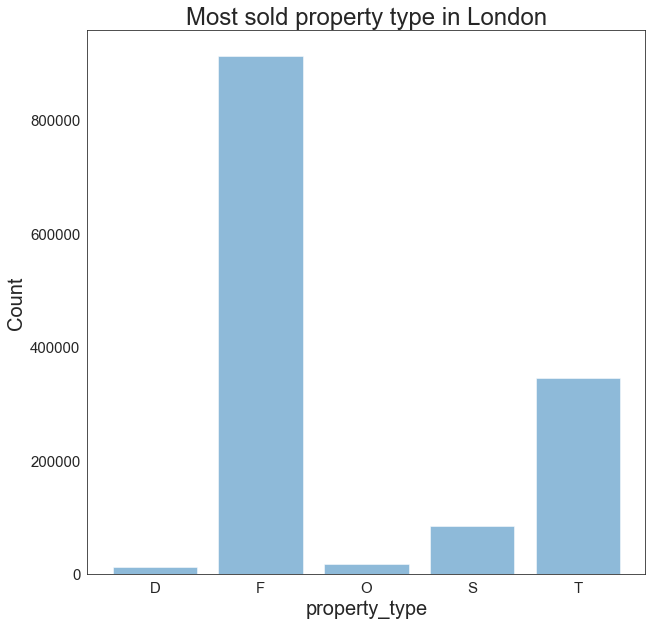

In [95]:
# Plot bar chart

plt.bar(houses_london_type['property_type'],houses_london_type['counts'], align='center', alpha=0.5)
plt.xlabel("property_type")
plt.ylabel("Count")
plt.title("Most sold property type in London")

plt.xticks(houses_london_type['property_type'])
plt.show()

#### Insight from 3
It seems that Flats are the most popular in London. This can be because of the space constraints in such a large city and also due to the fact that other type of properties are more expensive

#### 4. What are the overall housing sales trends – with the effects of financial crisis, COVID-19 etc.?
- We know that crisis affects the housing market. This will give us an insight into how were the actual effects

In [96]:
# Create data for the line chart by grouping
yearly_sum= df.groupby(df['year_of_transfer'])[['price']].sum().reset_index().rename(columns={"price": "sum"})
yearly_median = df.groupby(df['year_of_transfer'])[['price']].median().reset_index().rename(columns={"price": "median"})
yearly_mean = df.groupby(df['year_of_transfer'])[['price']].mean().reset_index().rename(columns={"price": "mean"})
yearly_count = df.groupby(df['year_of_transfer'])[['transaction_unique_identifier']].count().reset_index().rename(columns={"transaction_unique_identifier": "count"})

median_vs_mean = pd.merge(yearly_median, yearly_mean, left_on='year_of_transfer', right_on='year_of_transfer', how='inner')
med_mean_count = pd.merge(median_vs_mean, yearly_count, left_on='year_of_transfer', right_on='year_of_transfer', how='inner' )
sum_med_mean_count = pd.merge(med_mean_count, yearly_sum, left_on='year_of_transfer', right_on='year_of_transfer', how='inner' )

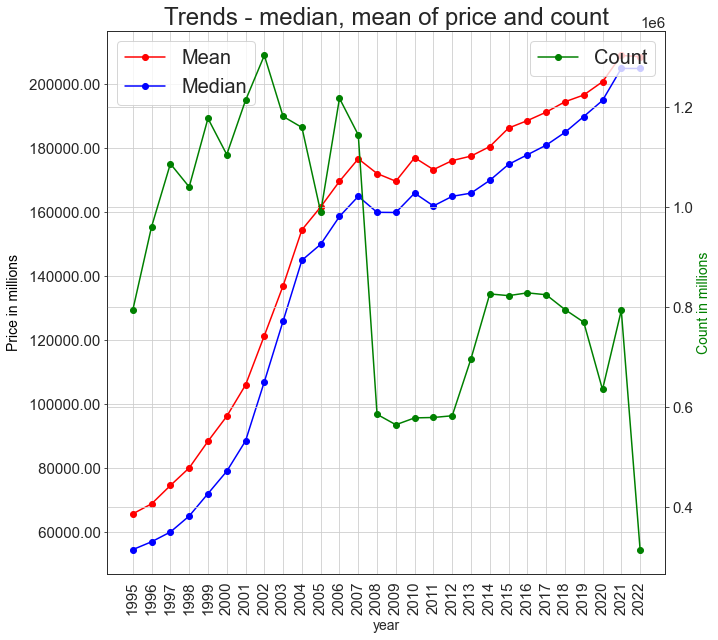

In [97]:
x = sum_med_mean_count['year_of_transfer']
y = sum_med_mean_count['mean']
z = sum_med_mean_count['median']
v = sum_med_mean_count['count']

# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(10, 10))
# make a plot
ax.plot(x,
        y,
        color="red", 
        marker="o")

ax.plot(x,
        z,
        color="blue", 
        marker="o")

ax.legend(['Mean', 'Median'])

# set x-axis label
ax.set_xlabel("year", fontsize = 14)
ax.set_xticks(x)

# set y-axis label
ax.set_ylabel("Price in millions",
              color="black",
              fontsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('% 1f'))
ax.grid()

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(x, v,color="green",marker="o")
ax2.legend(['Count'])

ax2.set_ylabel("Count in millions",color="green",fontsize=14)
ax.yaxis.set_major_formatter(FormatStrFormatter('% 1.2f'))
ax2.grid()


plt.title("Trends - median, mean of price and count")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.show()

No handles with labels found to put in legend.


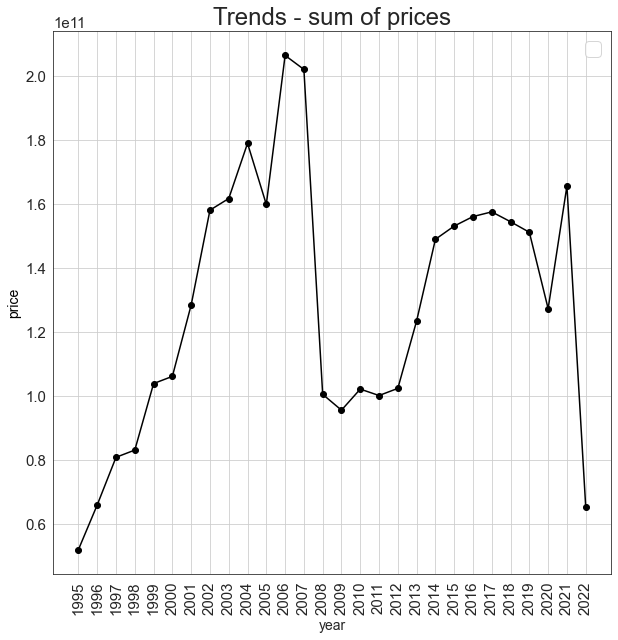

In [98]:
u = sum_med_mean_count['sum']

fig,ax = plt.subplots(figsize=(10, 10))

ax.plot(x,
        u,
        color="black", 
        marker="o")

# set x-axis label
ax.set_xlabel("year", fontsize = 14)
ax.set_xticks(x)

# set y-axis label
ax.set_ylabel("price",
              color="black",
              fontsize=14)
ax.grid()

plt.title("Trends - sum of prices")
plt.setp(ax.get_xticklabels(),rotation=90)
plt.legend()
plt.show()

#### Insights from 3:
Now that is a really interesting trend! We can deduce a lot from this graph.
- We see that the median and mean house prices were on the from years 1995 to 2000 and so were the number of houses being sold. The year 2000 was exactly when the dot-com bubble burst and we can see a decline in the number of houses sold. Even then, the median hose prices continued to rise.
- The housing market recovered from 2005 to 2007, with an increase in the number of houses sold, even though the prices were increasing.
- Then we see a steep crash corresponding to the 2007–08 financial crisis, with the number of houses sold falling to nearly half of the previous year. The prices of the houses also dropped, but ever so slightly.
- The market almost remained stagnant for the next 4–5 years before showing a slow recovery from 2012 through 2015. We see a slight decline then corresponding to Brexit.
- The next big drop in the housing price corresponds to the Covid 19 pandemic, with the lockdowns having an impact on the economy.
- The median house prices have been rising anyways all throughout the years, which means the houses are getting more expensive (without considering inflationary effects).

The data is only till August 2022, so we cannot say yet how this year went. However, it gives us a very good idea about where the house prices are headed!

Pre-2008 was a good time to buy houses, but after that they have always been expensive.

#### 5. What are the monthly effects of the sales trends over the years, again with the view of crises, pandemic etc.?

In [99]:
#Group by years and months of house sales
performance_df =  df.groupby(['year_of_transfer','month_of_transfer'])['transaction_unique_identifier'].count()\
                    .reset_index()\
                    .rename(columns={'transaction_unique_identifier':"count"})
# create a pivot table
popular_property_by_month = performance_df.pivot("month_of_transfer","year_of_transfer","count")

<AxesSubplot:title={'center':'House sales accross months from 1995 to 2022'}, xlabel='year_of_transfer', ylabel='month_of_transfer'>

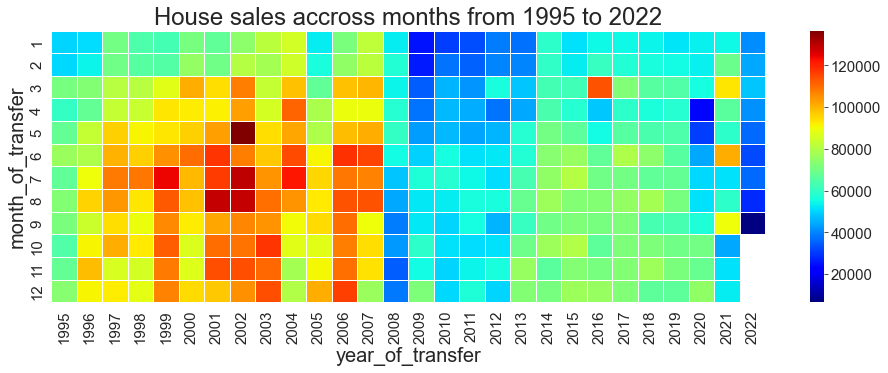

In [100]:
# Plot into a heatmap
plt.figure(figsize = (16,5))
plt.title("House sales accross months from 1995 to 2022")
sns.heatmap(popular_property_by_month, square=False, cmap='jet', linewidths=.5)

#### Insight from 5
Here we can see the monthly number of sales over the years. The dark blue ones are lower number of houses sold and dark red the higher number. We see the dip during the financial crisis in 2008 from August and the count remains relatively low even up to 2013. Then there is a pickup with small dips in 20 15. The next big decline is seen in April-May 2022 due to the pandemic, but it grows in the subsequent months. June 2021 sees a high number of houses sold. January and February seem to be bad months generally over the years.

#### 6. What are the effects when we drill down to the counties? How are the total sales? What is the mean?

<AxesSubplot:title={'center':'Number of house sales accross counties from 1995 to 2022'}, xlabel='year_of_transfer', ylabel='county'>

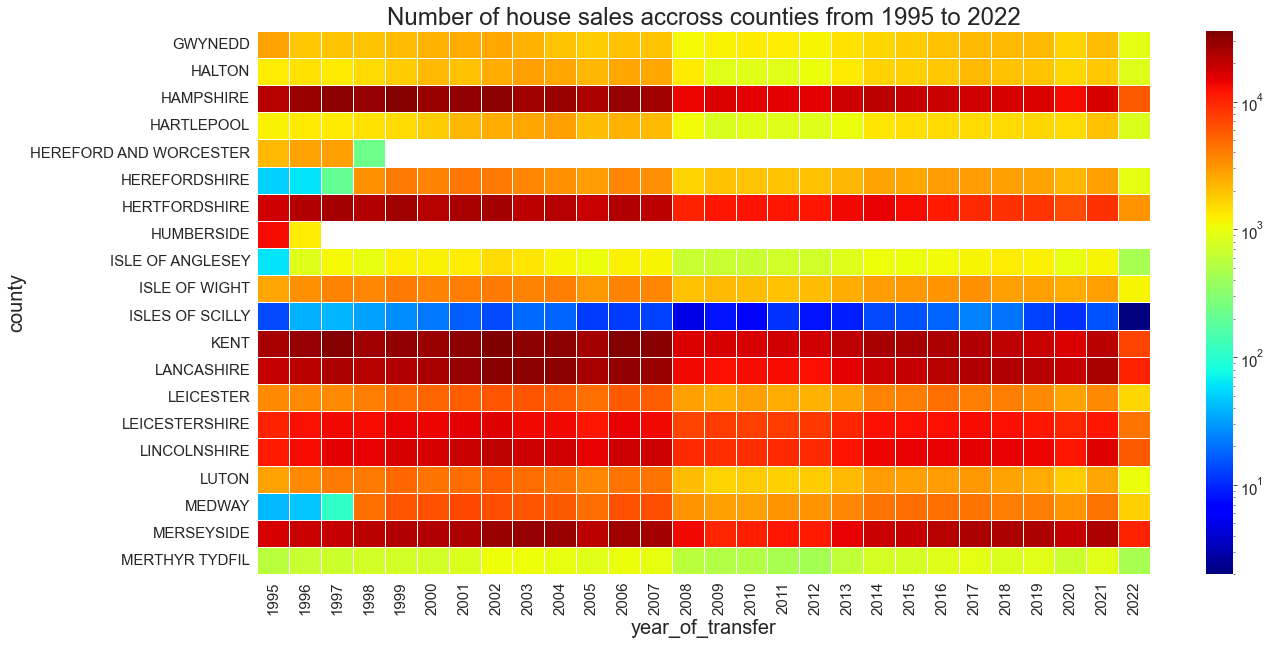

In [101]:
# Plotting total count of house sales in counties per year per month
#Prepare data for plotting
counties_df = df.groupby(['county','year_of_transfer'])['transaction_unique_identifier'].count()\
                .reset_index()\
                .rename(columns={'transaction_unique_identifier':'count'})

#Filling in with 0 because some counties might not have sales
counties_heatmap = counties_df.pivot('county','year_of_transfer','count').fillna(0)


# Plot heatmap with log scale 
from matplotlib.colors import LogNorm
plt.figure(figsize = (20,10))
plt.title("Number of house sales accross counties from 1995 to 2022")

# Display for a small selection from 50th county to 70th county in the list
sns.heatmap(counties_heatmap[50:70], norm=LogNorm(), cmap='jet', linewidths=.5)

<AxesSubplot:title={'center':'Number of house sales accross counties from 1995 to 2022'}, xlabel='year_of_transfer', ylabel='county'>

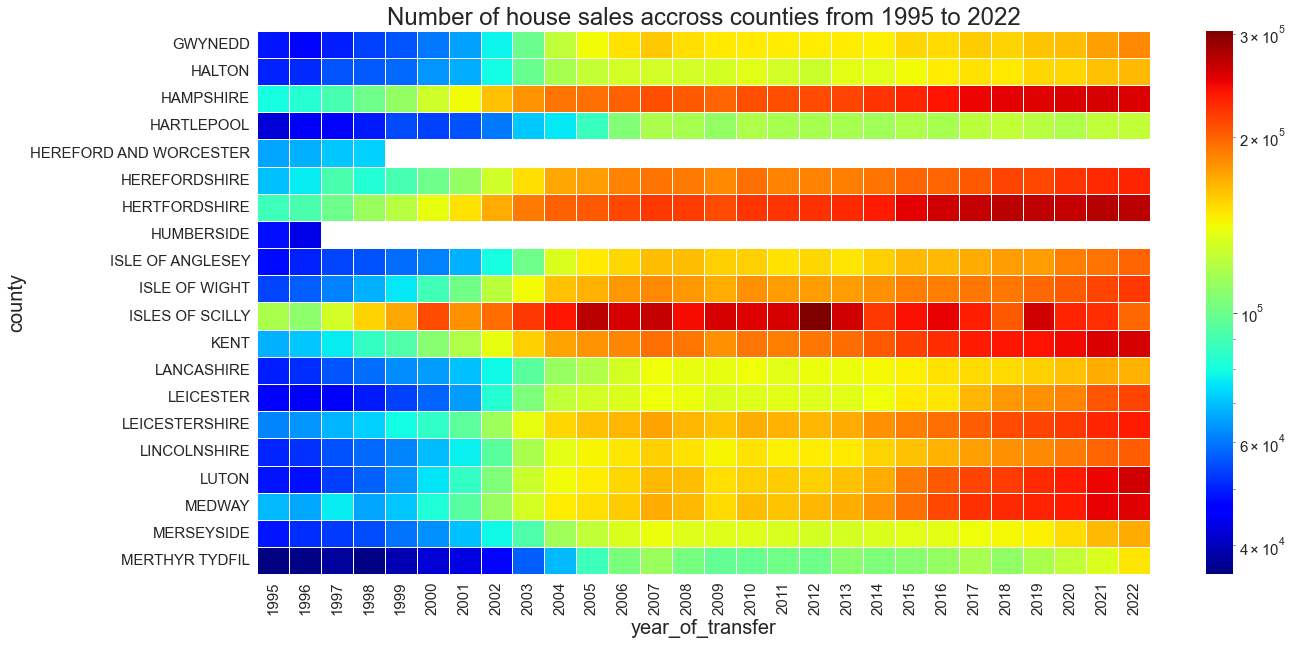

In [102]:
# Plotting the mean (total price / count) in counties per year per month
#Prepare data for plotting
counties_df = df.groupby(['county','year_of_transfer'])['price'].agg('mean')\
                .reset_index()\
                .rename(columns={'price':'mean'})

#Filling in with 0 because some counties might not have sales
counties_heatmap = counties_df.pivot('county','year_of_transfer','mean').fillna(0)


# Plot heatmap with log scale 
from matplotlib.colors import LogNorm
plt.figure(figsize = (20,10))
plt.title("Number of house sales accross counties from 1995 to 2022")

# Display for a small selection from 50th county to 70th county in the list
sns.heatmap(counties_heatmap[50:70], norm=LogNorm(), cmap='jet', linewidths=.5)

#### Insight from 6
If we dig deeper into the counties, the picture looks very different (on this random selection, at least). Some counties are resilient to the crisis/slowdowns with respect to sales of houses, showing only minor loss in sales. Examples – Hampshire, Herefordshire and Kent. 
For a deeper analysis, it is worth looking deeper into the sales here and comparing with the other counties.

We see that the mean (total price / count of houses) is increasing for counties like Hampshire, Hartfordshre and Kend. This means that fewer houses are getting sold, but at a higher price.